In [1]:
# Carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage import data
from skimage import io

In [32]:
# Carregando o conjunto iris dataset do link oficial
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                       'machine-learning-databases/iris/iris.data',
                       header=None)

# Obtendo o conjunto de dados X
X = df.iloc[:, [0, 2]].values

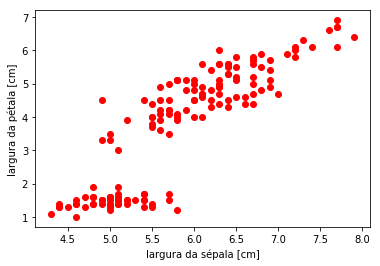

In [34]:
# Visualizando os dados 
plt.scatter(X[:, 0], X[:, 1],
            color='red', marker='o')
plt.xlabel('largura da sépala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.show()

In [36]:
#
#  Função de custo do kmeans
#
#  Entradas : X_{m,n}        = Uma matrix de m amostras e n caracteríticas
#             K              = Número de Clusters
#             C_{k, n}       = Centroídes
#             rotulos_{m, 1} = Um vetor com clusters de \{0, ldots, k-1\} para cada amostra de X
#
#  Saída : Função de custo (ou distorção)
#
def J(X, K, C, rotulos):
    d = np.zeros(X.shape[0])
    for k in range(K):
        d[rotulos == k] = np.linalg.norm(X[rotulos == k] - C[k], axis=1)
    return np.sum(np.square(d))
 

#
#  Implementação do kmeans
#
#  Entradas : X_{m,n}    = Uma matrix de m amostras e n caracteríticas
#             K          = Número de Clusters
#             iterations = Número máximo de iterações do algoritmo
#
#
#  Saídas : rotulos_{m, 1} = Um vetor com clusters de \{0, ldots, k-1\} para cada amostra de X
#           C_{k, n}       = Centroídes
#           custo          = Vetor de custo acumulado
#
def kmeans(X, K, iterations):

    np.random.RandomState(32)
    random_idx = np.random.permutation(X.shape[0])
    C = X[random_idx[:K]]
    rotulos = np.zeros(X.shape[0])
    custo = []
    
    for it in range(iterations):
        
        # Matriz de distâncias
        d = np.zeros([X.shape[0], K]) 
        
        # Cada cluster
        for k in range(K):   
            # Distância entre os dados e cada cluster
            dist_ci = np.linalg.norm(X-C[k, :], axis=1)
            d[:, k] = np.square(dist_ci)
    
        # Melhor cluster
        rotulos = np.argmin(d, axis=1)
    
        # Recalculando centros
        Cbefore = np.copy(C)   
        for k in range(K):
            C[k, :] = np.mean(X[rotulos == k, :], axis=0)
        
        # Armazenando os custos
        custo.append(J(X, K, Cbefore, rotulos))        
        
        # Testando convergência
        if np.all(Cbefore == C):
            break
            
    return rotulos, C, custo

In [37]:
# Rodando o kmeans
K = 3
iterations = 1000
(rotulos, C, custos) = kmeans(X, K, iterations)

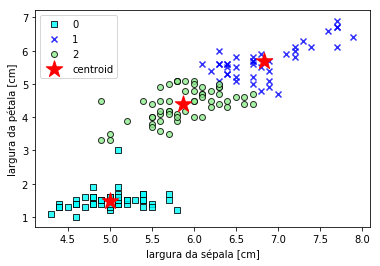

In [38]:
# Visualizando os dados
markers = ('s', 'x', 'o', '^', 'v')
colors = ('cyan', 'blue', 'lightgreen', 'gray', 'red')
cmap = ListedColormap(colors[:len(np.unique(rotulos))])

for idx, cl in enumerate(np.unique(rotulos)):
    plt.scatter(x=X[rotulos == cl, 0],
                y=X[rotulos == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
plt.scatter(C[:, 0], C[:, 1],
                  c='r', marker='*', s=300, label='centroid')
plt.xlabel('largura da sépala [cm]')
plt.ylabel('largura da pétala [cm]')
plt.legend(loc='upper left')
plt.show()

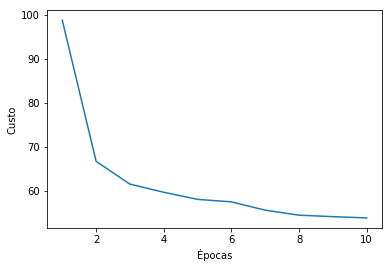

In [39]:
# Plotando a curva de custo
plt.plot(range(1, len(custos)+1), custos)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

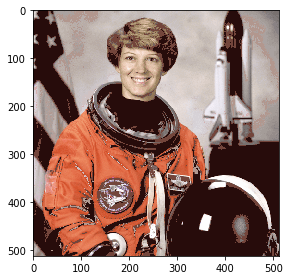

In [35]:
# Essa parte é um bônus, vale rodar e ver o quão grande são as aplicações de clusterização.
# Nesse caso estamos aplicando k-means para obter uma compressão da imagem, os resultados 
# são muito interessantes.
image = data.astronaut()
rows = image.shape[0]
cols = image.shape[1]
image = image.reshape(image.shape[0]*image.shape[1],3)

# Rodando o kmeans
K = 200
iterations = 10
(rotulos, C, custos) = kmeans(image, K, iterations)

# Convertendo os clusters e rotulos para inteiros
clusters = np.asarray(C,dtype=np.uint8) 
labels = np.asarray(rotulos,dtype=np.uint8)  
labels = labels.reshape(rows,cols)

# Imagem clusterizada
imgout = np.zeros((labels.shape[0],labels.shape[1],3),dtype=np.uint8)
for i in range(labels.shape[0]):
    for j in range(labels.shape[1]):
            imgout[i,j,:] = clusters[labels[i,j],:]

io.imshow(imgout) 

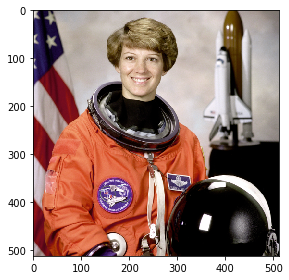

In [25]:
# Imagem original para comparar
io.imshow(data.astronaut()) 